In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
!unzip /content/drive/MyDrive/deeplearning/datafordemo.zip -d .

Archive:  /content/drive/MyDrive/deeplearning/datafordemo.zip
   creating: ./datafordemo/test/
   creating: ./datafordemo/test/bike/
  inflating: ./datafordemo/test/bike/bike_329.bmp  
  inflating: ./datafordemo/test/bike/bike_330.bmp  
  inflating: ./datafordemo/test/bike/bike_331.bmp  
  inflating: ./datafordemo/test/bike/bike_332.bmp  
  inflating: ./datafordemo/test/bike/bike_333.bmp  
  inflating: ./datafordemo/test/bike/bike_334.bmp  
  inflating: ./datafordemo/test/bike/bike_335.bmp  
  inflating: ./datafordemo/test/bike/bike_336.bmp  
  inflating: ./datafordemo/test/bike/bike_337.bmp  
  inflating: ./datafordemo/test/bike/bike_338.bmp  
  inflating: ./datafordemo/test/bike/bike_339.bmp  
  inflating: ./datafordemo/test/bike/bike_340.bmp  
  inflating: ./datafordemo/test/bike/bike_341.bmp  
  inflating: ./datafordemo/test/bike/bike_342.bmp  
  inflating: ./datafordemo/test/bike/bike_343.bmp  
  inflating: ./datafordemo/test/bike/bike_344.bmp  
  inflating: ./datafordemo/test/bik

In [ ]:
# Đường dẫn đến thư mục chứa dữ liệu
train_data_dir = "/content/datafordemo/train"
test_data_dir = "/content/datafordemo/test"
validation_data_dir = "/content/datafordemo/valid"

In [ ]:
# Kích thước của ảnh
img_height = 224
img_width = 224
batch_size = 32

In [ ]:
# Tạo các data generators cho training, validation và test
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 972 images belonging to 5 classes.
Found 276 images belonging to 5 classes.
Found 137 images belonging to 5 classes.


In [ ]:
# Số lớp của dữ liệu
NUM_CLASSES = len(train_generator.class_indices)

In [ ]:
# Xây dựng mô hình MLP
model = Sequential([
    Flatten(input_shape=(img_height, img_width, 3)),  # Đầu vào có kích thước 224x224 và 3 kênh màu
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
# Compile mô hình
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Huấn luyện mô hình
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator)

Epoch 1/100
31/31 [==============================] - 16s 468ms/step - loss: 25.5038 - accuracy: 0.2346 - val_loss: 15.2526 - val_accuracy: 0.2645
Epoch 2/100
31/31 [==============================] - 16s 500ms/step - loss: 8.4782 - accuracy: 0.2912 - val_loss: 4.3173 - val_accuracy: 0.2428
Epoch 3/100
31/31 [==============================] - 14s 460ms/step - loss: 2.6853 - accuracy: 0.4187 - val_loss: 5.1979 - val_accuracy: 0.2065
Epoch 4/100
31/31 [==============================] - 14s 461ms/step - loss: 3.2333 - accuracy: 0.4084 - val_loss: 6.2579 - val_accuracy: 0.1486
Epoch 5/100
31/31 [==============================] - 14s 454ms/step - loss: 3.3499 - accuracy: 0.4187 - val_loss: 4.0059 - val_accuracy: 0.1522
Epoch 6/100
31/31 [==============================] - 14s 464ms/step - loss: 2.1638 - accuracy: 0.4650 - val_loss: 2.4134 - val_accuracy: 0.2536
Epoch 7/100
31/31 [==============================] - 14s 448ms/step - loss: 2.3803 - accuracy: 0.4743 - val_loss: 2.0086 - val_accurac

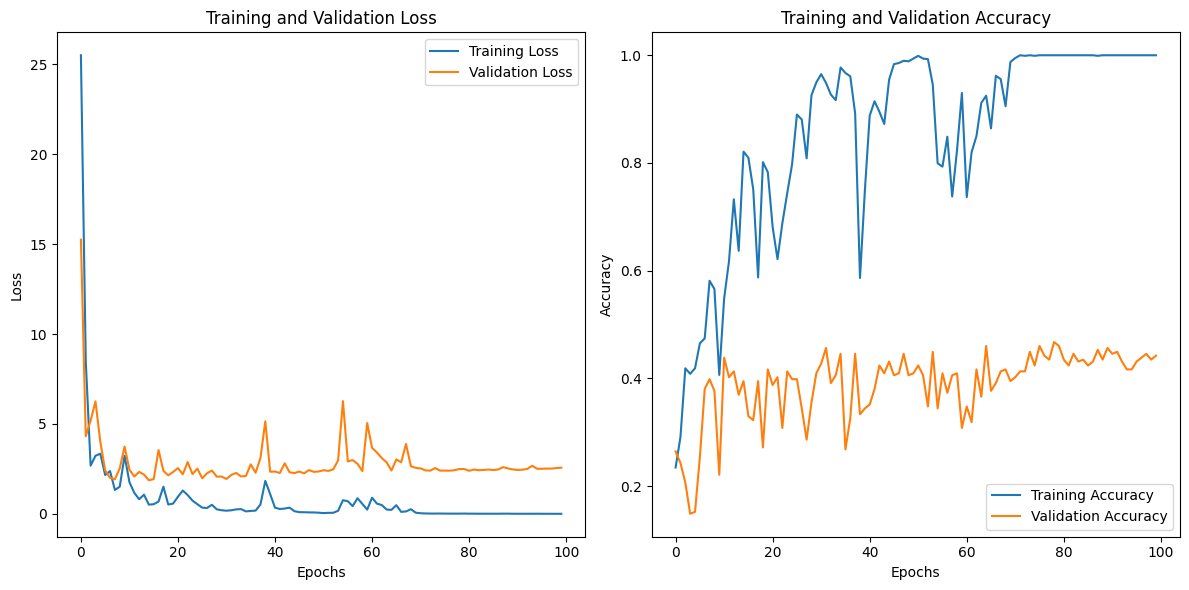

In [ ]:
# Vẽ biểu đồ huấn luyện
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.3f}")

5/5 [==============================] - 2s 410ms/step - loss: 3.4603 - accuracy: 0.3285
Test accuracy: 0.328
